## Calculating the Return of a Portfolio of Securities

Download data for a portfolio composed of 5 stocks. Do it for British Petroleum, Ford, Exxon, Lincoln, and Apple for the period ‘2000-1-1’ until today.

In [1]:
import pandas
import pandas_datareader
import numpy

In [4]:
stocks = ['BP', 'F', 'AAPL']
rec_data = pandas.DataFrame()
for item in stocks:
    rec_data[item] = pandas_datareader.data.DataReader(item, data_source = 'yahoo', start = '2000-1-1')['Adj Close']

In [5]:
rec_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4973 entries, 2000-01-03 to 2019-10-08
Data columns (total 3 columns):
BP      4973 non-null float64
F       4973 non-null float64
AAPL    4973 non-null float64
dtypes: float64(3)
memory usage: 155.4 KB


In [6]:
rec_data.head(5)

,BP,F,AAPL
Date,,,
2000-01-03,24.129086,15.374426,3.488905
2000-01-04,24.000874,14.860723,3.194754
2000-01-05,24.821411,14.915769,3.241507
2000-01-06,24.872696,14.934105,2.960991
2000-01-07,24.411144,16.034901,3.101249


### Normalization to 100:

$$
\frac {P_t}{P_0} * 100
$$

Normalize to a hundred and plot the data on a graph (you can apply the .loc() or the .iloc() method). 

In [10]:
norm_data = rec_data / rec_data.iloc[0] * 100
norm_data

,BP,F,AAPL
Date,,,
2000-01-03,100.000000,100.000000,100.000000
2000-01-04,99.468641,96.658715,91.568964
2000-01-05,102.869257,97.016752,92.909016
2000-01-06,103.081801,97.136017,84.868795
2000-01-07,101.168957,104.295931,88.888892
2000-01-10,98.193404,102.386638,87.325523
2000-01-11,98.193404,99.642025,82.858746
2000-01-12,96.174250,102.505946,77.889445
2000-01-13,97.555806,101.312621,86.432157


In [11]:
import matplotlib

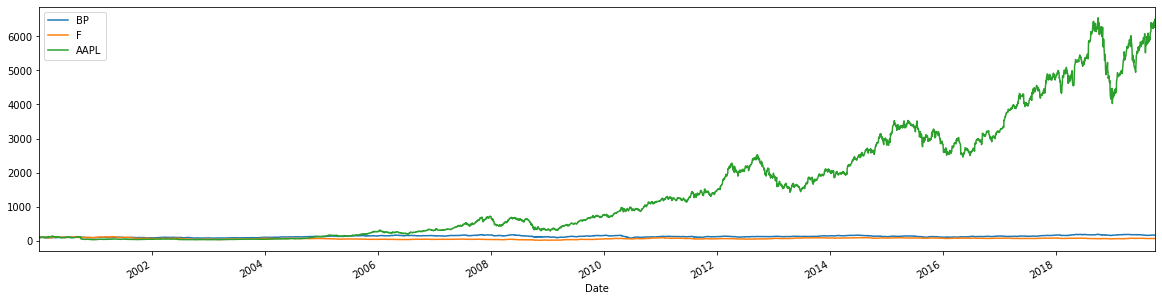

In [14]:
norm_data.plot(figsize = (20,5))
matplotlib.pyplot.show()

How would you interpret the behavior of the stocks? Just by looking at the chart, would you be able to create a portfolio that provides a solid return on investment?

*****

### Calculating the Return of a Portfolio of Securities

Obtain the simple return of the securities in the portfolio and store the results in a new table.

In [15]:
simple_ret = (rec_data / rec_data.shift(1)) - 1
simple_ret

,BP,F,AAPL
Date,,,
2000-01-03,NaN,NaN,NaN
2000-01-04,-0.005314,-0.033413,-0.084310
2000-01-05,0.034188,0.003704,0.014634
2000-01-06,0.002066,0.001229,-0.086539
2000-01-07,-0.018557,0.073710,0.047368
2000-01-10,-0.029412,-0.018306,-0.017588
2000-01-11,0.000000,-0.026806,-0.051151
2000-01-12,-0.020563,0.028742,-0.059973
2000-01-13,0.014365,-0.011642,0.109677


First, assume you would like to create an equally-weighted portfolio. Create the array, naming it “weights”.

In [25]:
weights = numpy.array([0.3, 0.3, 0.4])

Obtain the annual returns of each of the stocks and then calculate the dot product of these returns and the weights.

In [26]:
simple_ret.mean() *250

BP      0.059528
F       0.055785
AAPL    0.295031
dtype: float64

In [32]:
perc = numpy.dot((simple_ret.mean() * 250), weights) * 100

Transform the result into a percentage form. 

In [33]:
print('{} % rate of return'.format(perc))

15.260633060876739 % rate of return


Is the return of this portfolio satisfactory?